#**WATER YIELD FOR CANADIAN DRAINAGE REGIONS - Fall 2024 Data Science Project**
Hanna Assefa, Yana Naman, Victoria Liu


# **Contributions**
**Hanna Assefa:**

Dataset Curation and Preprocessing: Chose the dataset to work on, and cleaned it for experiments.

Data Exploration and Summary Statistics: Worked on the ANOVA test for this section.

Visualization, Result Analysis, Conclusion: Created the graphs for the ML section of the report.

Final Tutorial Report Creation: Wrote the introduction and organized sections I specifically worked on to match a tutorial format.

**Yana Naman:**

Dataset Preprocessing: Got the unique regions from the dataset, as well as got the count information of the current columns that we need in the dataset.

Data Exploration and Summary Statistics: Worked on the T-test part for this topic.

ML Algorithm Design and Development: Decided on a KNN ML algorithm to classify new values into water yield types. Created the mainframe of the algorithm.

ML Algorithm Training and Test Data Analysis: formatted the data and split it into train and test sets. Then fed it into the algorithm to assess the predicted outputs.

Final Tutorial Report Creation: Commented the code for the sections I worked on and added text sections to match a tutorial format. Added the "Why KNN?" section in the Machine Learning Section.

**Victoria Liu:**

Data Exploration and Summary Statistics: Worked on the Man-Whitney U Test

# **Introduction**

Our project focuses on analyzing the monthly water yield of various drainage regions across Canada. In this project we investigate how different factors, such as the month and year influence the water yield recorded in specific areas. By studying and analyzing these variations, we are able to discover different patterns and long-term changes in water yield. Additionally, we examine and compare the water yields across distinct regions, identifying any differences and similarities that may shed light on the characteristics of each area.

Throughout this tutorial, we will guide you our comprehensive processes. This includes the collection and preparation of raw data, followed by data cleaning to for accuracy. We also conduct analysis using a variety of Data Science techniques and Machine Learning models to discover new insights on the data, and to see if the machine learning model can accuratly predict and classify the mean, median and, maximum water yield for an area.

# **Data Curation**

#### ***Data Collection***

Our data comes from the website "Statistics Canada," which is the national statistical office of Canada. It lists different drainage regions in Canada along with their minimum, median, and maximum water yields according to the month and range of years specified.

**Find the original Dataset here:** https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3810000301

The first thing we will do is import the csv and transform it into a dataframe.

In [ ]:
import pandas as pd

data = pd.read_csv('water_yield.csv')

#### ***Preprocessing***

Next we will remove the columns that are not relevent to our experiments, we only need information regarding type of water yield (median, maximum, or minimum), month, year, region, unit of measurement, and drainage value.

In [ ]:
data.drop(['UOM_ID', 'SCALAR_ID', 'SCALAR_FACTOR', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'VECTOR', 'COORDINATE', 'DGUID'], axis=1, inplace=True)
data

,REF_DATE,GEO,Month,Water yield,UOM,VALUE
0,1971/2000,Pacific Coastal drainage region,January,Median monthly volume,Cubic kilometres,26.04
1,1981/2010,Pacific Coastal drainage region,January,Median monthly volume,Cubic kilometres,31.56
2,1991/2020,Pacific Coastal drainage region,January,Median monthly volume,Cubic kilometres,31.97
3,1971/2000,Pacific Coastal drainage region,January,Maximum monthly volume,Cubic kilometres,58.69
4,1981/2010,Pacific Coastal drainage region,January,Maximum monthly volume,Cubic kilometres,58.69
...,...,...,...,...,...,...
1723,1981/2010,Newfoundland (Island) drainage region,December,Maximum monthly volume,Cubic kilometres,21.19
1724,1991/2020,Newfoundland (Island) drainage region,December,Maximum monthly volume,Cubic kilometres,21.19
1725,1971/2000,Newfoundland (Island) drainage region,December,Minimum monthly volume,Cubic kilometres,5.19
1726,1981/2010,Newfoundland (Island) drainage region,December,Minimum monthly volume,Cubic kilometres,5.19


Here are the current columns in the data set that we actually do need.

In [ ]:
count = data.count()
count

,0
REF_DATE,1728
GEO,1728
Month,1728
Water yield,1728
UOM,1728
VALUE,1728


Notice how there are two different units of measurements? Lets clean the data to only use one type: Cubic kilometres

In [ ]:
data = data[data['UOM'] == 'Cubic kilometres']

We know that we will be analyzing how the water yield is impacted by the region, so let's make a list of all the unique regions in the dataset.

In [ ]:
#Get all the unique regions the dataset has
regions = data['GEO'].unique()
regions

array(['Pacific Coastal drainage region',
       'Fraser-Lower Mainland drainage region',
       'Okanagan-Similkameen drainage region', 'Columbia drainage region',
       'Peace-Athabasca drainage region', 'Missouri drainage region',
       'North Saskatchewan drainage region',
       'South Saskatchewan drainage region',
       'Assiniboine-Red drainage region', 'Great Lakes drainage region',
       'Ottawa drainage region', 'St. Lawrence drainage region',
       'North Shore-Gaspé drainage region',
       'Saint John-St. Croix drainage region',
       'Maritime Coastal drainage region',
       'Newfoundland (Island) drainage region'], dtype=object)

# **Exploratory Data Analysis**

Now that our data is ready, lets conduct some experiments on it and see what we can learn about water yields in Canada! First, lets import matplotlib so that we can visulaize our discoveries.

In [ ]:
import matplotlib.pyplot as plt

#### ***Man-Whitney U Test***

Let's start with the Man-Whitney U Test to test an hypothesis about how the seasons controls the drianage areas. We first create a null and alternative hypothesis to test:

**Null Hypothesis:** The seasons (colder vs. warmer) do not affect the median of the drainage areas

**Alternative Hypothesis:** The seasons (colder vs. warmer) do affect the median of the drainage areas

**(Assume $\alpha=0.05$)**

Import the statistical functions we need from SciPy

In [ ]:
import scipy.stats as stats

For this hypothesis, divide the dataset into 2 different dataframes, one for cold months (January, February, September, October, November, December) and the other for warm months (March, April, May, June, July, August). Name these two dataframes colder_season and warmer_season. Specifically focus on the median drainage values



In [ ]:
median_df = data[data['Water yield'] == 'Median monthly volume']
colder_season = []
warmer_season = []

cold = ['January', 'February', 'September', 'October', 'November', 'December']
warm = ['March', 'April', 'May', 'June', 'July', 'August']

counter = 0
for month in median_df['Month']:
  if month in cold:
    colder_season.append(median_df.iloc[counter])
  else:
    warmer_season.append(median_df.iloc[counter])
  counter = counter + 1

colder_season = pd.DataFrame(colder_season)
warmer_season = pd.DataFrame(warmer_season)


Input warmer_season and colder_season as arguments into the Man-Whitney U Test

In [ ]:
man_whitney_test = stats.mannwhitneyu(colder_season['VALUE'], warmer_season['VALUE'])
man_whitney_test

MannwhitneyuResult(statistic=32038.0, pvalue=2.3137842565493003e-06)

#### **What can we Learn from the Results?**

According to the Man Whitney U Test, we can reject the null hypothesis because the p-value is less than alpha (0.05). This means that from looking at the median, it is highly likely the temperature and seasonality affects the monthly volume (supports alternative hypothesis). This makes sense because warmer season means higher temperatures which results in more evaporation.

#### **Let's visualize our Data with a Box Plot!**

Graph the warmer_season and colder_season median monthly drainage values into a box and whisker plot

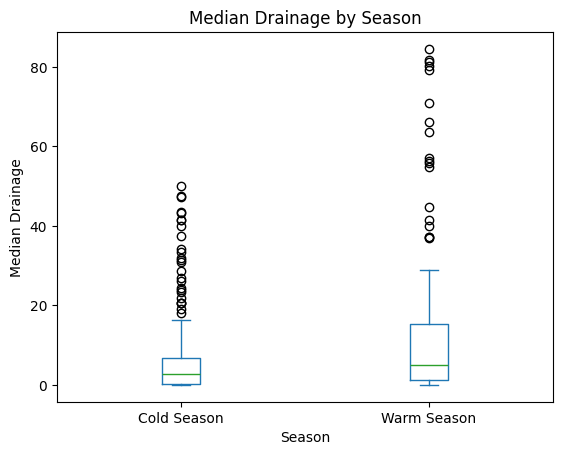

In [ ]:
df = pd.DataFrame({'Cold Season': colder_season['VALUE'],
                   'Warm Season': warmer_season['VALUE']})
df[['Cold Season', 'Warm Season']].plot(kind= 'box', title = 'Median Drainage by Season', xlabel = 'Season', ylabel = 'Median Drainage')
plt.show()

You can see a pattern amongst the data that the warmer seasons tend to have higher drainage volumes compared to colder seasons. However, from the box plot, we can see that there are a lot of outliers, and that is because regions are not taken into account in this statistical test. The regions the data takes from is from multiple parts of the world, and level of industrialization and other environmental factors will factor into drainage volume. However despite these points, the data provided is slightly under-represented because there's only one volume measurement of maximum, minimum, and median for every month in different years.

#### ***ANOVA Test***

Lets say we wanted to see if the region impacts the median water yield in a specific range of years, lets choose the years 1991 and 2000. This time we will use the ANOVA test. First, create the null and alternative hypothesis:


**Null Hypthothesis:** The Region (geo) does not have an impact on its Median Water Yield from the years 1991 to 2000.

**Alternative Hypothesis:** The Region (geo) does have an impact on its Median Water Yield from the years 1991 to 2000.

**(Assume $\alpha=0.05$)**

Now filter the data to fit the year and water yield volume requirements for our hypothesis

In [ ]:
median_data = data.loc[(data['REF_DATE'] == '1991/2020') &
 (data['Water yield'] == 'Median monthly volume')]

Make seperate groups for each region:

In [ ]:
seperate_groups = median_data.groupby('GEO')
group1 = seperate_groups.get_group('Pacific Coastal drainage region')
group2 = seperate_groups.get_group('Fraser-Lower Mainland drainage region')
group3 = seperate_groups.get_group('Okanagan-Similkameen drainage region')
group4 = seperate_groups.get_group('Columbia drainage region')
group5 = seperate_groups.get_group('Missouri drainage region')
group6 = seperate_groups.get_group('North Saskatchewan drainage region')
group7 = seperate_groups.get_group('South Saskatchewan drainage region')
group8 = seperate_groups.get_group('Assiniboine-Red drainage region')
group9 = seperate_groups.get_group('Great Lakes drainage region')
group10 = seperate_groups.get_group('Ottawa drainage region')
group11 = seperate_groups.get_group('North Shore-Gaspé drainage region')
group12 = seperate_groups.get_group('Maritime Coastal drainage region')
group13 = seperate_groups.get_group('Newfoundland (Island) drainage region')
group14 = seperate_groups.get_group('Peace-Athabasca drainage region')
group15 = seperate_groups.get_group('St. Lawrence drainage region')
group16 = seperate_groups.get_group('Saint John-St. Croix drainage region')

To run the ANOVA test, use the f_oneway function from SciPy, and view the results!

In [ ]:
anova_test = stats.f_oneway(group1['VALUE'], group2['VALUE'], group3['VALUE'],
                            group4['VALUE'], group5['VALUE'], group6['VALUE'],
                            group7['VALUE'], group8['VALUE'], group9['VALUE'],
                            group10['VALUE'], group11['VALUE'], group12['VALUE'],
                            group13['VALUE'], group14['VALUE'], group15['VALUE'],
                            group16['VALUE'])
anova_test



F_onewayResult(statistic=21.482700828731044, pvalue=3.1774944730063184e-32)

#### **What can we Learn from the Results?**

Since the p-value is greater than the alpha value, we fail to reject the null hypothesis, meaning that the null hyphothesis is true. This means that the geography of an area does not affect what the average median water yield is.

#### **Let's visualize our Data with a Box Plot!**

[]

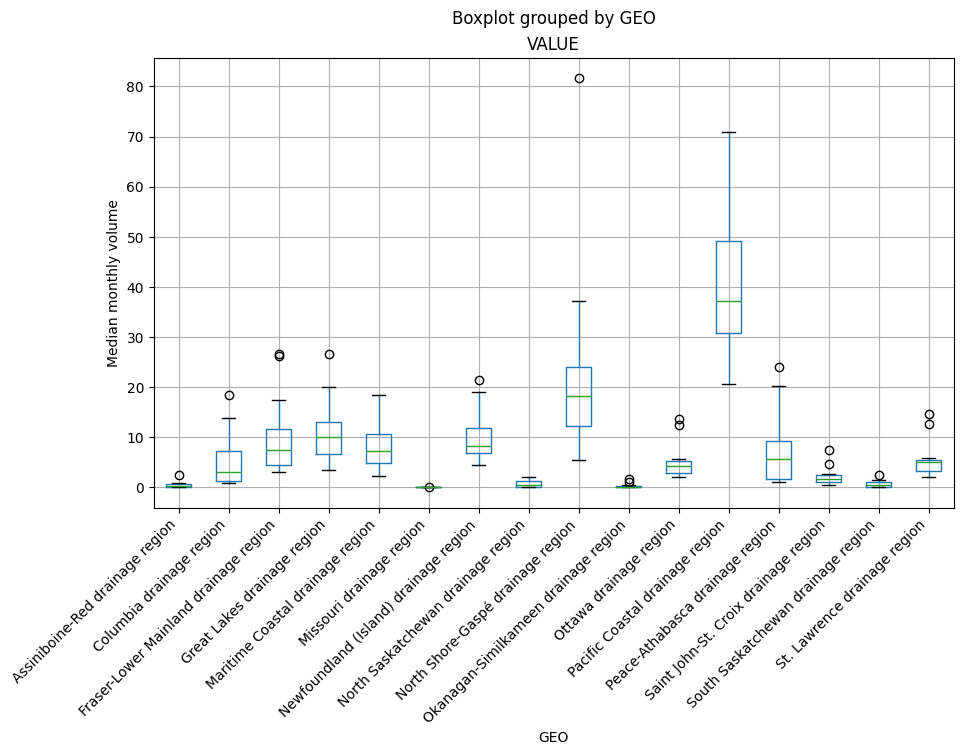

In [ ]:
median_data.boxplot('VALUE', by='GEO', figsize=(10, 6))

plt.xlabel("GEO")
plt.ylabel("Median monthly volume")
plt.xticks(rotation=45, ha='right')
plt.plot()

The graph above shows that the pacific Coastal region has the overall highest water yields besides an outlier from the North Shore-Gaspe region. Most other outliers are not too far away from the rest of the data exept for this region. However, because the data used for the ANOVA test were average medians and not all of the volumes collected over the years, the plots are slightly underrepresented. In addition, there is only three medians for every month per region, and those medians were taken at different points of the year.

#### ***T-Test***

If we wanted to compare the means of two regions to see if they are drastically different, we would use the T-Test like we do below. Similarly to the previous tests, we create a null and alternative hypothesis.

**Null Hypothesis:** The Colombia drainage region's mean value is not drastically different from the St. Lawrence drainage region's mean value

**Alternative Hypothesis:** The Colombia drainage region's mean value is drastically different from the St. Lawrence drainage region's mean value

**(Assume $\alpha=0.05$)**

We first start with creating seperate dataframes for the two regions we are comparing with just their drainage values

In [ ]:
colombia_df = data[data['GEO'] == 'Columbia drainage region']['VALUE']
lawrence_df = data[data['GEO'] == 'St. Lawrence drainage region']['VALUE']

We then declare an alpha variable, in this case 0.05

In [ ]:
alpha = 0.05

Next, we run the T-test function from scipy.stats and collect the p-value from the output.

In [ ]:
p_value = stats.ttest_ind(a=colombia_df, b=lawrence_df, equal_var=False)
pvalue_df = pd.DataFrame(p_value)
pval = pvalue_df.values[1]

We then compare the p-value to the alpha to see whether the null hypothesis was rejected or failed to reject.

In [ ]:
if pval > alpha:
  print("Fail to reject Null", pval)
elif pval <= alpha:
  print("Reject Null", pval)

Fail to reject Null [0.57330179]


The following code gets the means of the two dataframes of the two regions and plots them via a bar chart to compare the means.

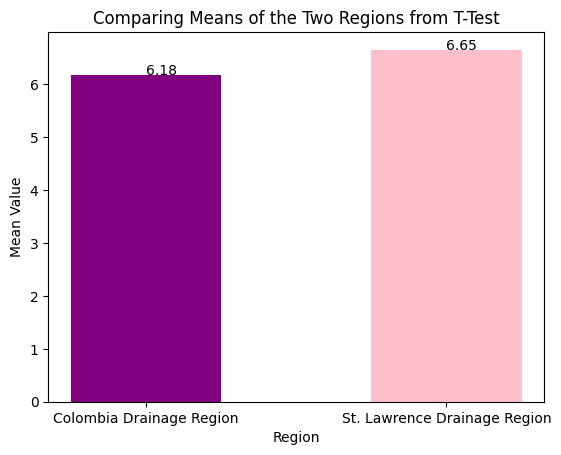

In [ ]:
means = [colombia_df.mean(), lawrence_df.mean()]
label = ['Colombia Drainage Region', 'St. Lawrence Drainage Region']
plt.bar(label, means, color=['purple', 'pink'], width=0.5)
for i, mean in enumerate(means):
  plt.text(i, mean, f'{mean:.2f}')
plt.title('Comparing Means of the Two Regions from T-Test')
plt.xlabel('Region')
plt.ylabel('Mean Value')
plt.show()

#### **What can we Learn from the Results?**

The code essentially explains that:

Due to having similar values in the dataset, the mean values of the two regions are not drastically different. Through the T-Test we can see that the p-value is greater than the alpha value therefore failing to reject the null hypothesis. Due to this, it shows how even if the values of the regions may be similar, there are outliers and other factors that differentiate the regions do not have a significant difference over the mean, it results in the means not being drastically different from each other. However, the data points provided by the dataset are not vast, therefore the test is not a completely representative test. The data points provided only contain maximum, minimum, and medium values, and these values are not enough to conclude an accurate mean for two regions.

# **Primary Analysis**

#### ***Machine Learning Algorithm: K Nearest Neighbors (KNN)***

In [ ]:
# Create a Dataframe with only the necessary columns from the original dataset
ml_data = data[['Water yield', 'VALUE', 'REF_DATE', 'GEO', 'UOM']]

# Only using one unit of measurement
ml_data = ml_data[ml_data['UOM'] == 'Cubic kilometres']

# List of regions
regions = ml_data['GEO'].unique()

# List of Years
years = ml_data['REF_DATE'].unique()

ml_data

,Water yield,VALUE,REF_DATE,GEO,UOM
0,Median monthly volume,26.04,1971/2000,Pacific Coastal drainage region,Cubic kilometres
1,Median monthly volume,31.56,1981/2010,Pacific Coastal drainage region,Cubic kilometres
2,Median monthly volume,31.97,1991/2020,Pacific Coastal drainage region,Cubic kilometres
3,Maximum monthly volume,58.69,1971/2000,Pacific Coastal drainage region,Cubic kilometres
4,Maximum monthly volume,58.69,1981/2010,Pacific Coastal drainage region,Cubic kilometres
...,...,...,...,...,...
1723,Maximum monthly volume,21.19,1981/2010,Newfoundland (Island) drainage region,Cubic kilometres
1724,Maximum monthly volume,21.19,1991/2020,Newfoundland (Island) drainage region,Cubic kilometres
1725,Minimum monthly volume,5.19,1971/2000,Newfoundland (Island) drainage region,Cubic kilometres
1726,Minimum monthly volume,5.19,1981/2010,Newfoundland (Island) drainage region,Cubic kilometres


In [ ]:
from sklearn.preprocessing import LabelEncoder
#clean up the new dataset by dropping any NaN values and preprocess the data using encoding
#0 = Maximum Monthly volume
#1 = Median Monthly volume
#2 = Minimum Monthly volume
ml_data.dropna()

#convert from object type to string for encoding
ml_data['Water yield'] = ml_data['Water yield'].astype(str)
label_encoder = LabelEncoder()
ml_data['Water yield'] = label_encoder.fit_transform(ml_data['Water yield'])

ml_data

,Water yield,VALUE,REF_DATE,GEO,UOM
0,1,26.04,1971/2000,Pacific Coastal drainage region,Cubic kilometres
1,1,31.56,1981/2010,Pacific Coastal drainage region,Cubic kilometres
2,1,31.97,1991/2020,Pacific Coastal drainage region,Cubic kilometres
3,0,58.69,1971/2000,Pacific Coastal drainage region,Cubic kilometres
4,0,58.69,1981/2010,Pacific Coastal drainage region,Cubic kilometres
...,...,...,...,...,...
1723,0,21.19,1981/2010,Newfoundland (Island) drainage region,Cubic kilometres
1724,0,21.19,1991/2020,Newfoundland (Island) drainage region,Cubic kilometres
1725,2,5.19,1971/2000,Newfoundland (Island) drainage region,Cubic kilometres
1726,2,5.19,1981/2010,Newfoundland (Island) drainage region,Cubic kilometres


#### **Why KNN?**
One of the main reasons we chose KNN was due to the fact that we were classifying a value into one of three groups (Maximum Monthly Volume, Median Monthly Volume, and Minimum Monthly Volume). KNN algorithm  makes classifying simple with it's ability to adapt to new data efficently, which works well with grouping new water yield values. KNN can also handle non-linear relationships. Another positive to the algorithm is it does not need extenstive training as it memorizes patterns and bases its predictions off of them.

In [ ]:
#Split data into train/test sets and normalize them
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
seed = 42

def KNeighborsWaterYield(region, year):
    print(f"Region: {region} -> Years: {year}")
    curr_data = ml_data[(ml_data['GEO'] == region) & (ml_data['REF_DATE'] == year)]
    X = curr_data[['VALUE']]
    y = curr_data[['Water yield']]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y['Water yield'], test_size=0.2, random_state=seed)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_scaled, y_train)

    # Test the model on the test set to see if it predicted correctly
    y_pred = knn.predict(X_test_scaled)

    # Decode predictions
    decoded_y_pred = label_encoder.inverse_transform(y_pred)
    decoded_y_test = label_encoder.inverse_transform(y_test)

    # Visualization
    results_df = pd.DataFrame({'Actual': decoded_y_test, 'Predicted': decoded_y_pred})

    # Count the occurrences of each class
    actual_counts = results_df['Actual'].value_counts()
    predicted_counts = results_df['Predicted'].value_counts()

    # Combine into a single DataFrame for plotting
    class_counts = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).fillna(0)

    # Plot the data
    class_counts.plot(kind='bar', figsize=(8, 6), color=['blue', 'orange'], alpha=0.7)
    plt.title('Class Distribution: Actual vs Predicted')
    plt.xlabel('Water Yield Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Actual', 'Predicted'])
    plt.show()


# **Visualization**

The visualization compares the actual and predicted values between the median, maximum, and minimum drainage categories by region and years for our KNN model. Each region has graphs for 3 year ranges: 1971/2000, 1981/2000, and 1991/2020. The goal for our KNN model is to successfully predict the water type yield (median, maximum, or minimum) given an arbitary value for a region at any year. Our KNN model shows that it was unable to accuractely predict the drainage type, with the majority of the time the predicted value was greater than the actual value. This is because not enough context was provided in the data to make these assumptions. Minimum, maximum, and median values vary from region to region and year by year. As mentioned during the exploratory data analysis portion, for every month in a different year range, there contains a median, maximum, and minimum value. As there are three year ranges in total, each region would have 9 points for a single month across 3 year ranges. Three points is not enough to represent an entire month for one year ranges as it would be difficult to observe patterns. Seasonal changes happens over the years, therefore a minimum drainage value in August will be starkly different than the minimum drainage value in Decemeber. As a result, our KNN model did not preform well as it lacks data and does not have enough data to take into account confounding variables.



Region: Pacific Coastal drainage region -> Years: 1971/2000


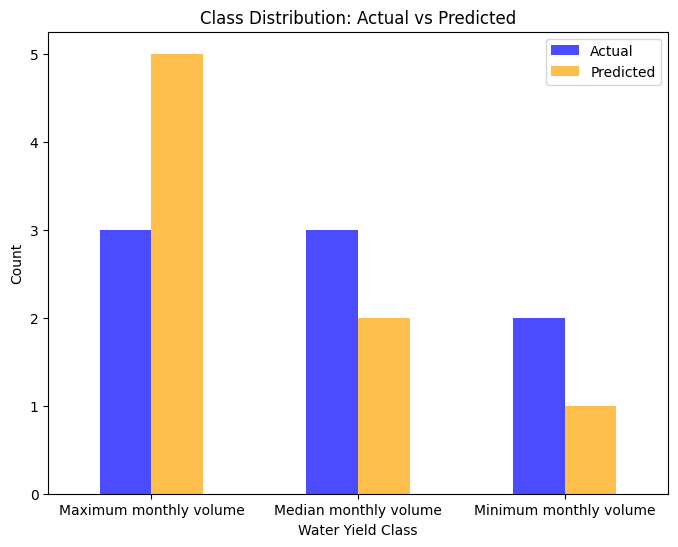

Region: Pacific Coastal drainage region -> Years: 1981/2010


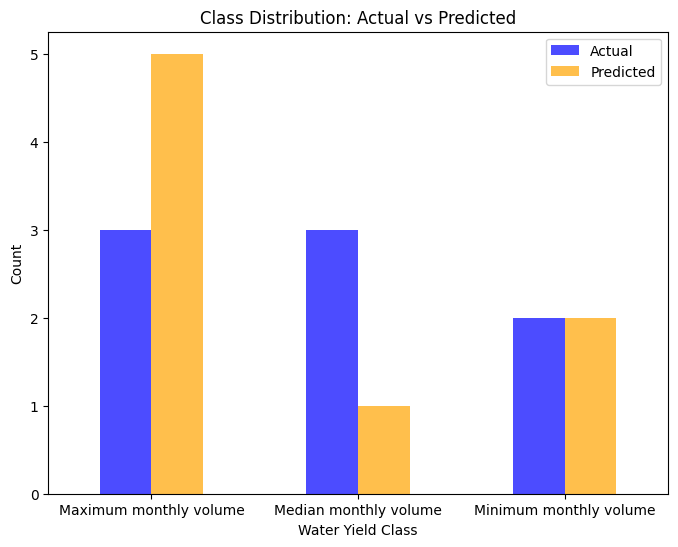

Region: Pacific Coastal drainage region -> Years: 1991/2020


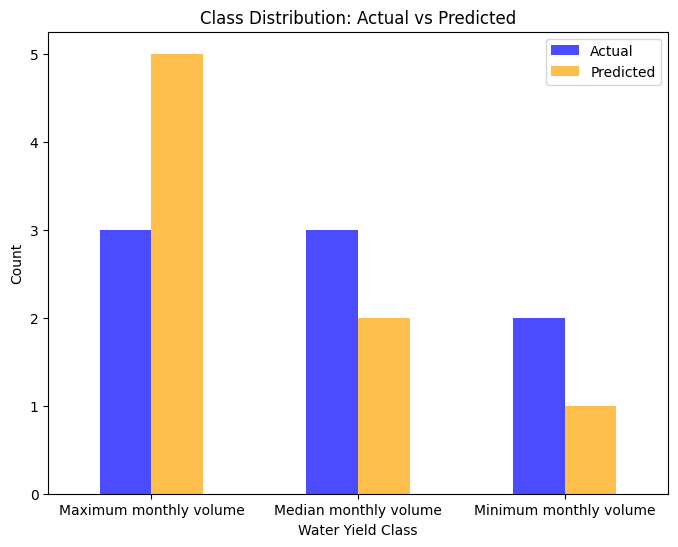

Region: Fraser-Lower Mainland drainage region -> Years: 1971/2000


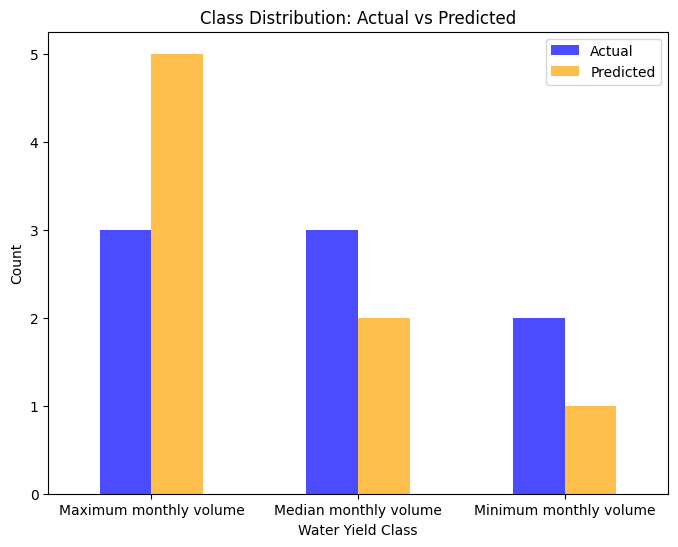

Region: Fraser-Lower Mainland drainage region -> Years: 1981/2010


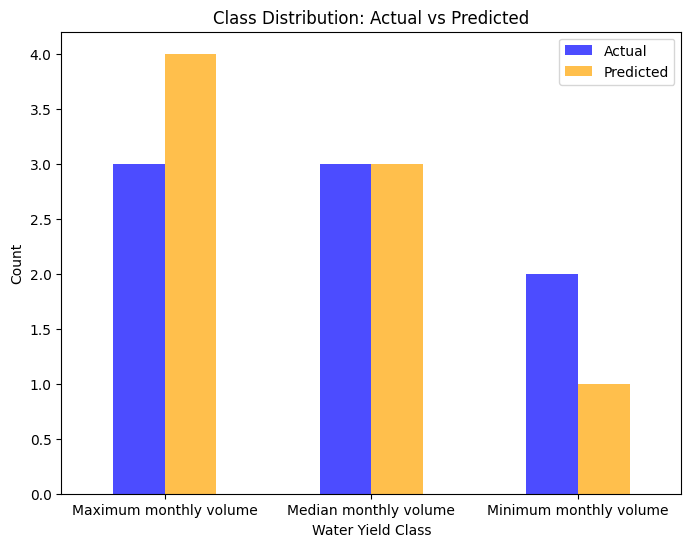

Region: Fraser-Lower Mainland drainage region -> Years: 1991/2020


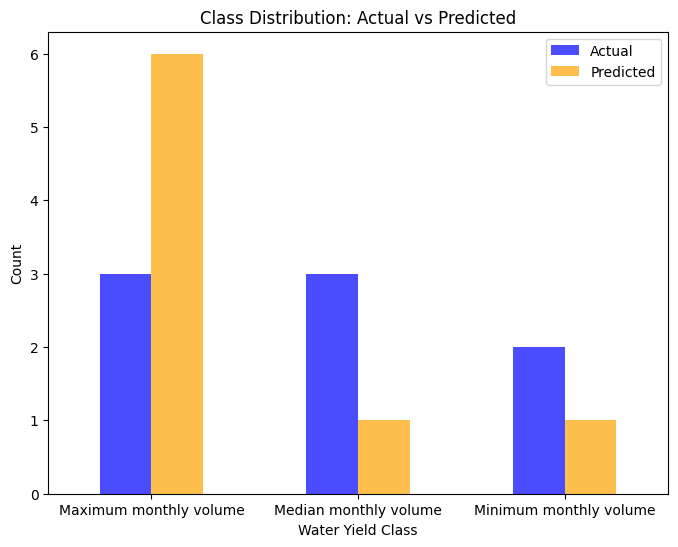

Region: Okanagan-Similkameen drainage region -> Years: 1971/2000


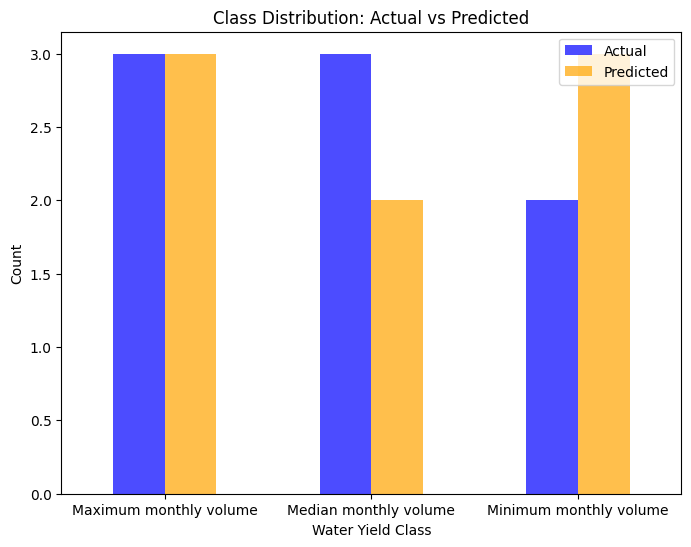

Region: Okanagan-Similkameen drainage region -> Years: 1981/2010


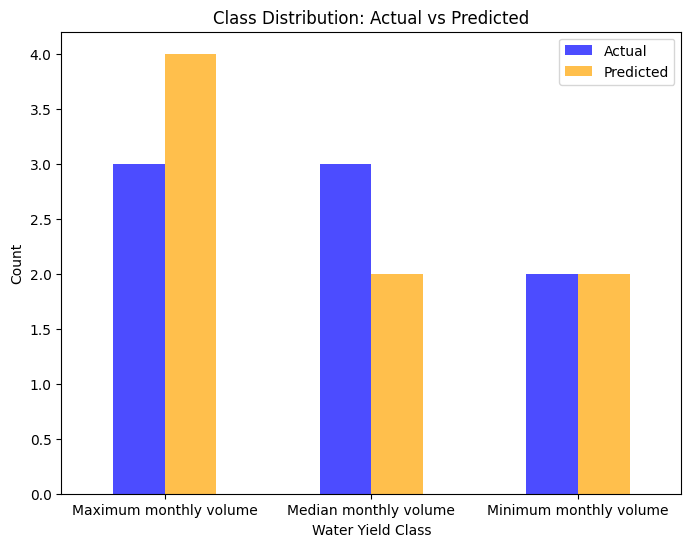

Region: Okanagan-Similkameen drainage region -> Years: 1991/2020


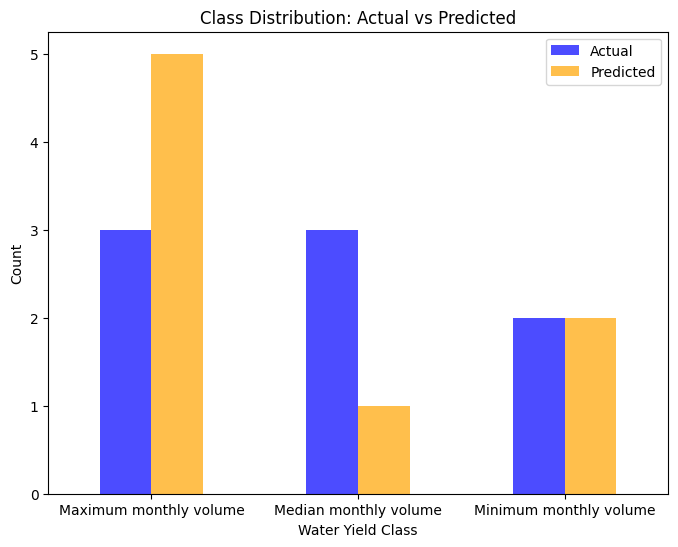

Region: Columbia drainage region -> Years: 1971/2000


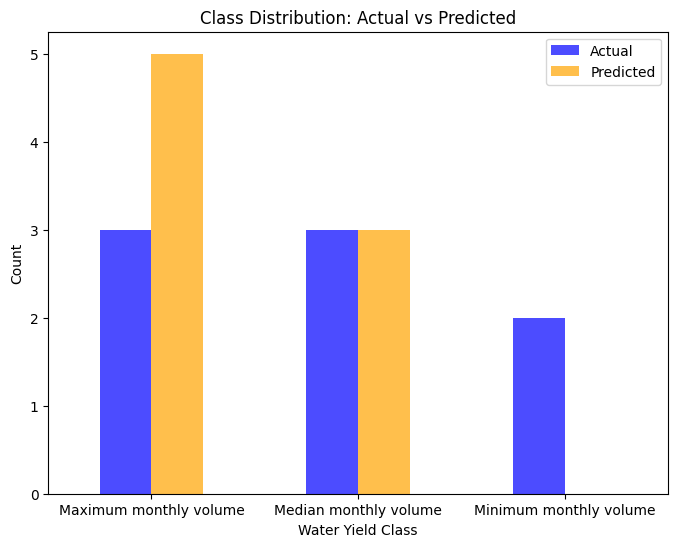

Region: Columbia drainage region -> Years: 1981/2010


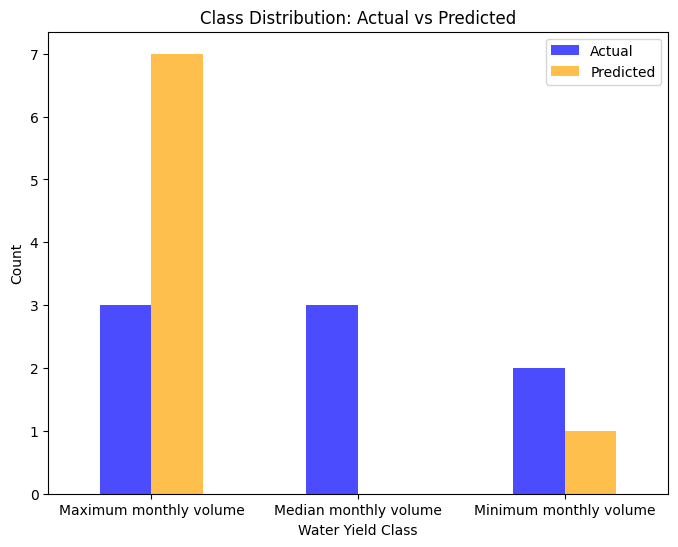

Region: Columbia drainage region -> Years: 1991/2020


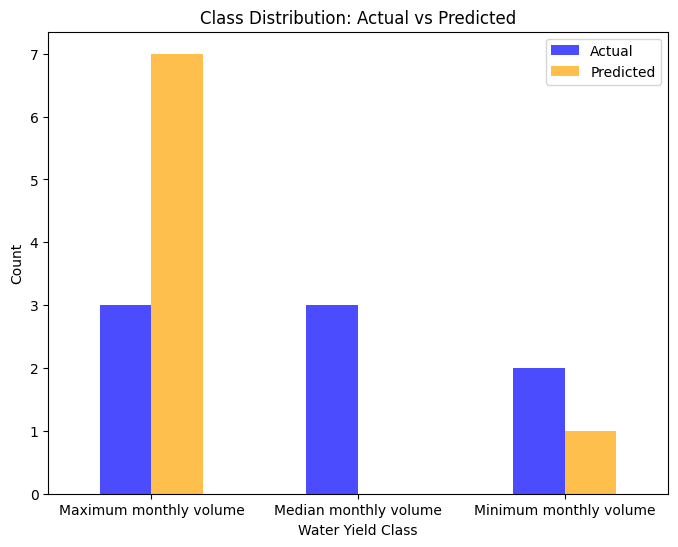

Region: Peace-Athabasca drainage region -> Years: 1971/2000


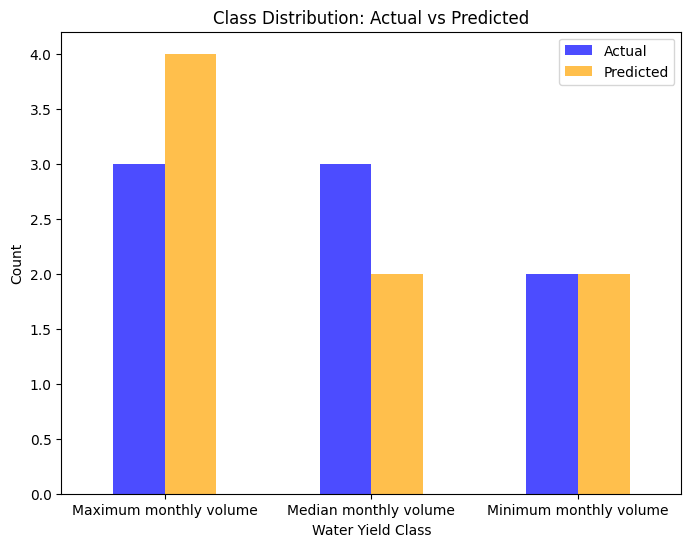

Region: Peace-Athabasca drainage region -> Years: 1981/2010


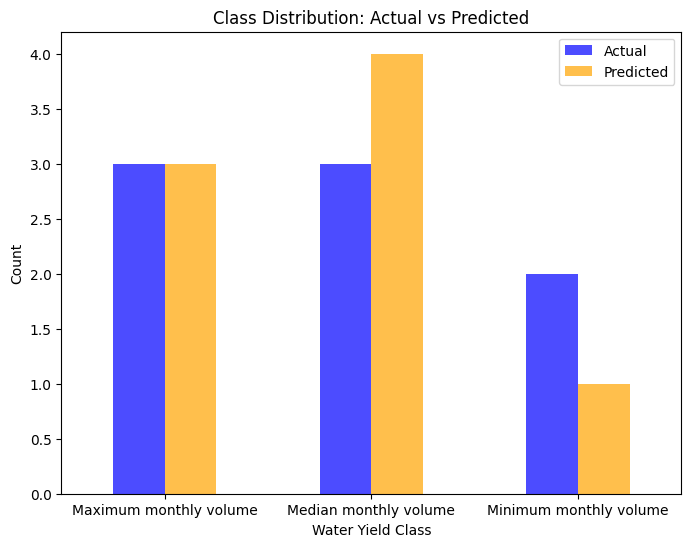

Region: Peace-Athabasca drainage region -> Years: 1991/2020


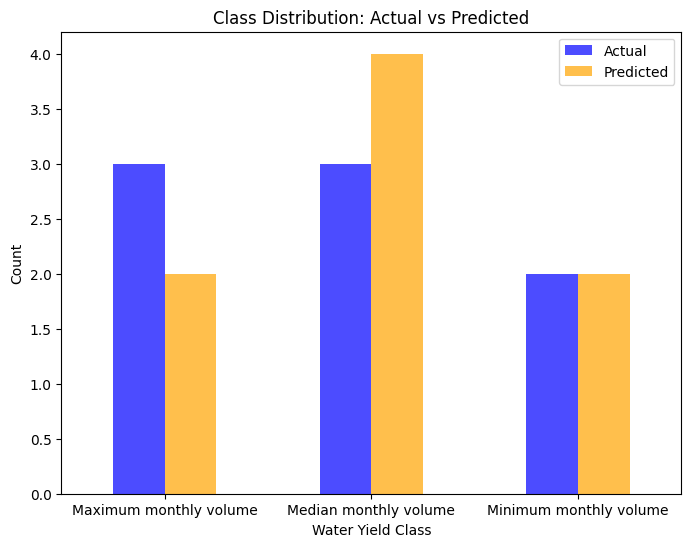

Region: Missouri drainage region -> Years: 1971/2000


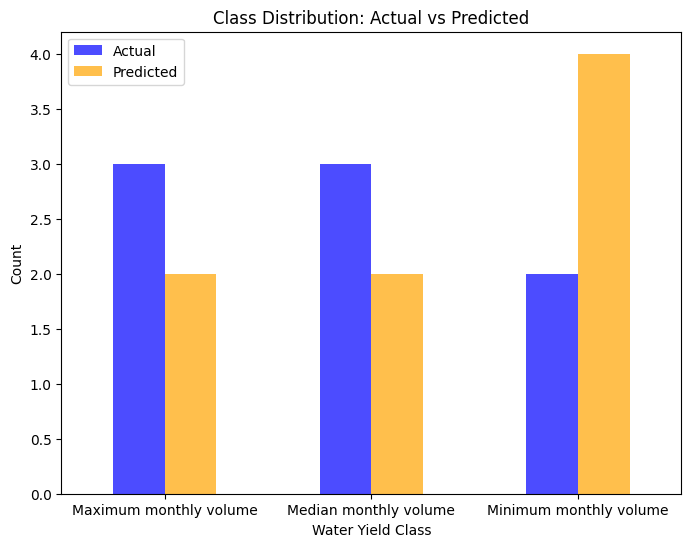

Region: Missouri drainage region -> Years: 1981/2010


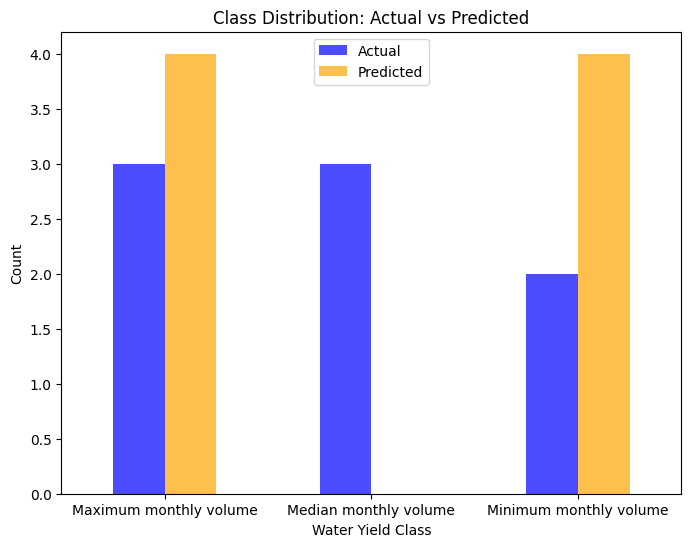

Region: Missouri drainage region -> Years: 1991/2020


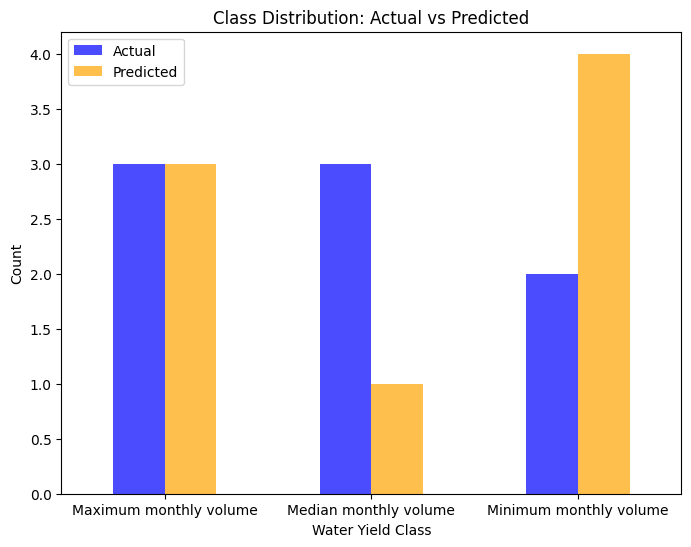

Region: North Saskatchewan drainage region -> Years: 1971/2000


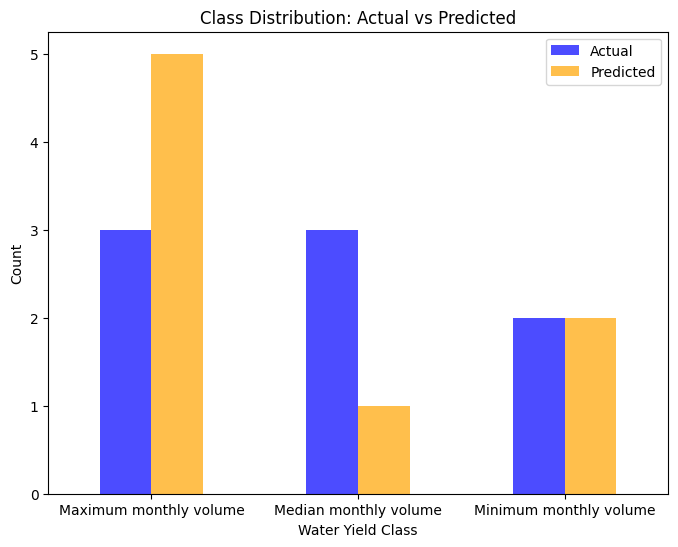

Region: North Saskatchewan drainage region -> Years: 1981/2010


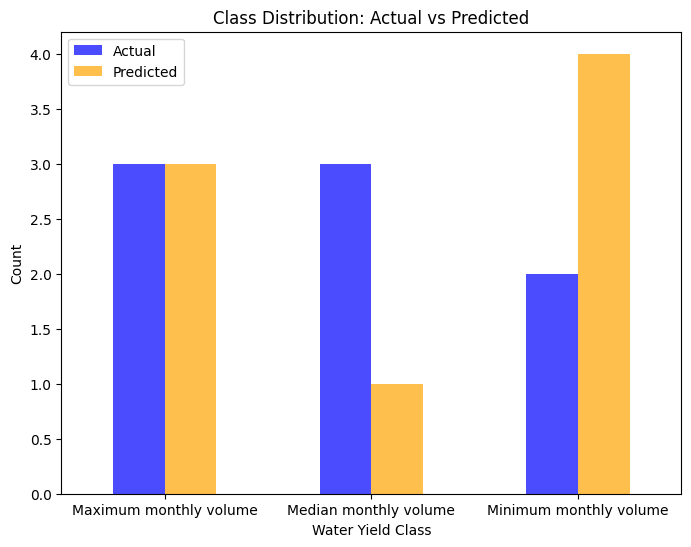

Region: North Saskatchewan drainage region -> Years: 1991/2020


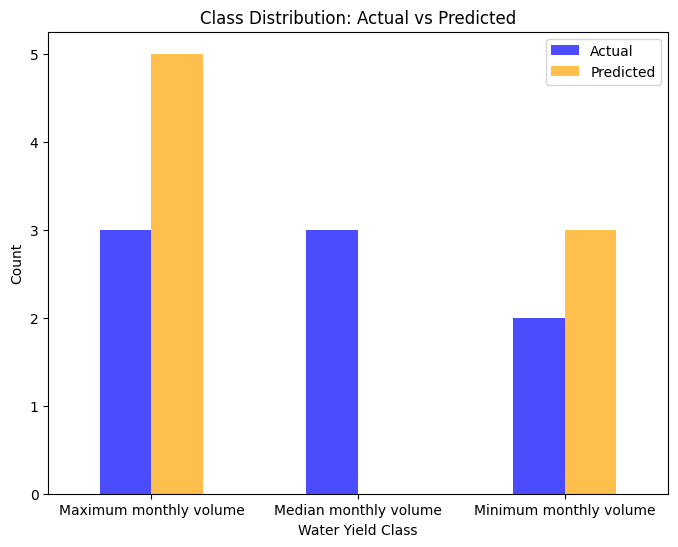

Region: South Saskatchewan drainage region -> Years: 1971/2000


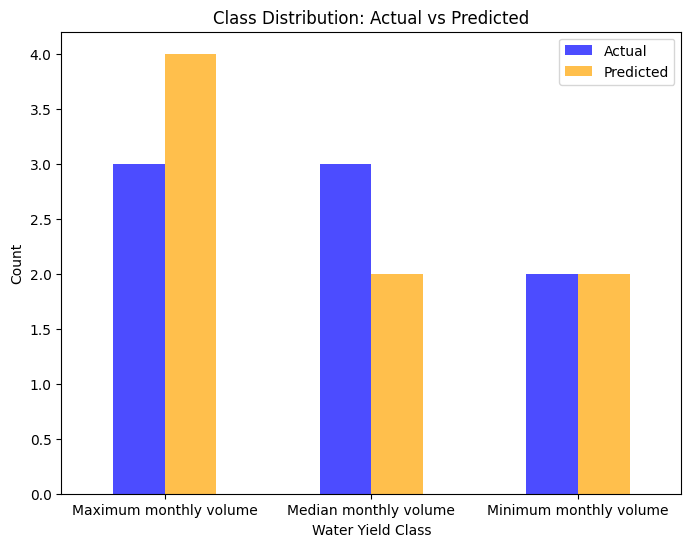

Region: South Saskatchewan drainage region -> Years: 1981/2010


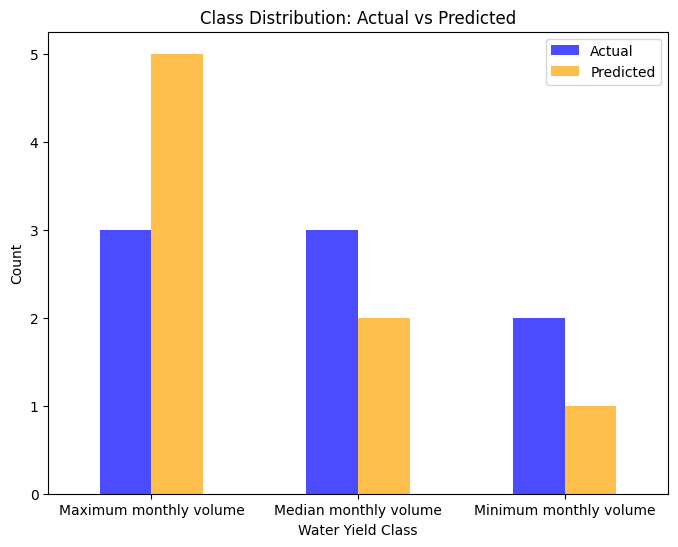

Region: South Saskatchewan drainage region -> Years: 1991/2020


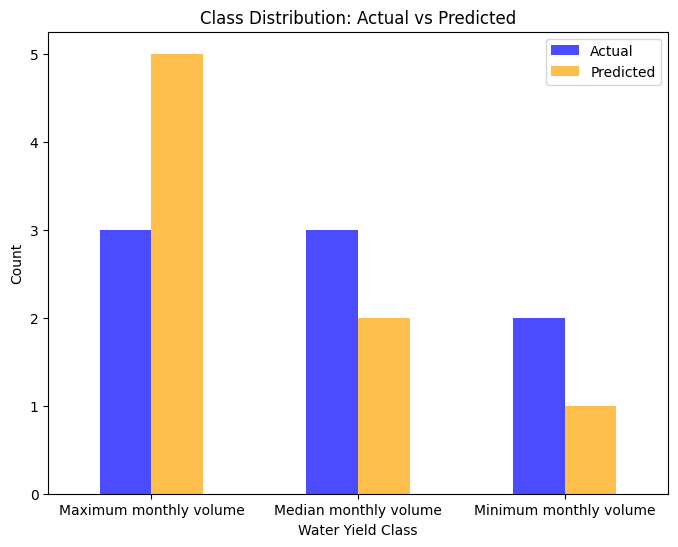

Region: Assiniboine-Red drainage region -> Years: 1971/2000


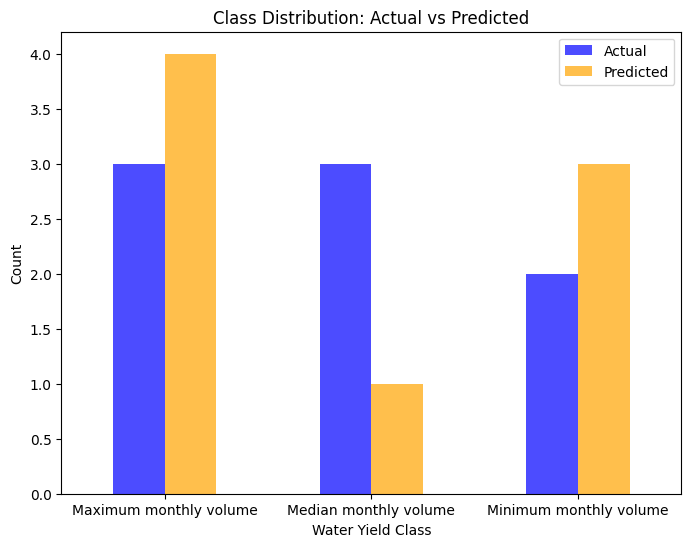

Region: Assiniboine-Red drainage region -> Years: 1981/2010


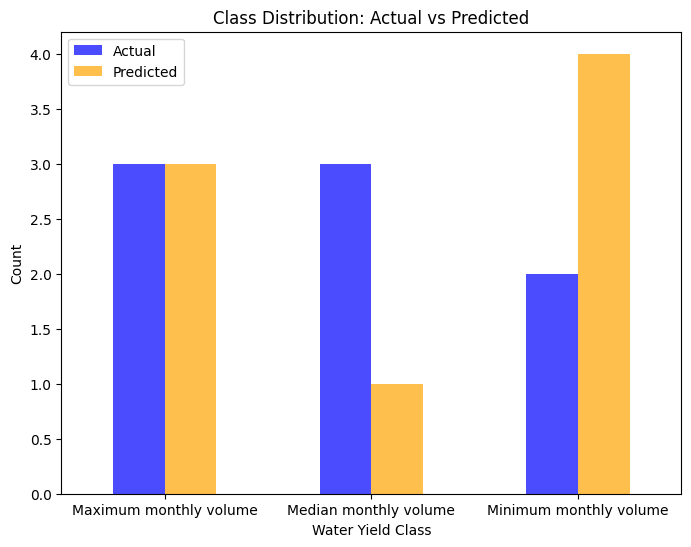

Region: Assiniboine-Red drainage region -> Years: 1991/2020


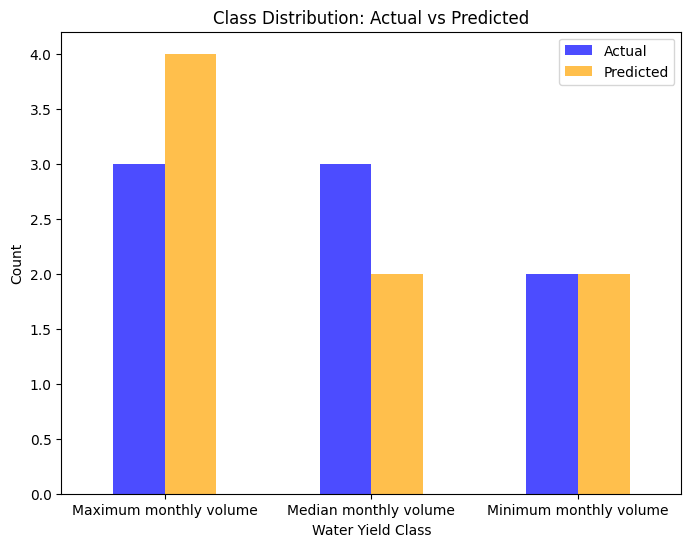

Region: Great Lakes drainage region -> Years: 1971/2000


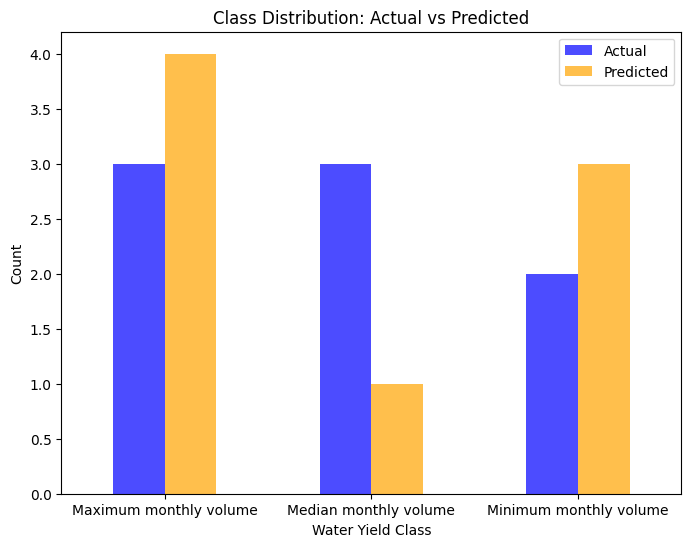

Region: Great Lakes drainage region -> Years: 1981/2010


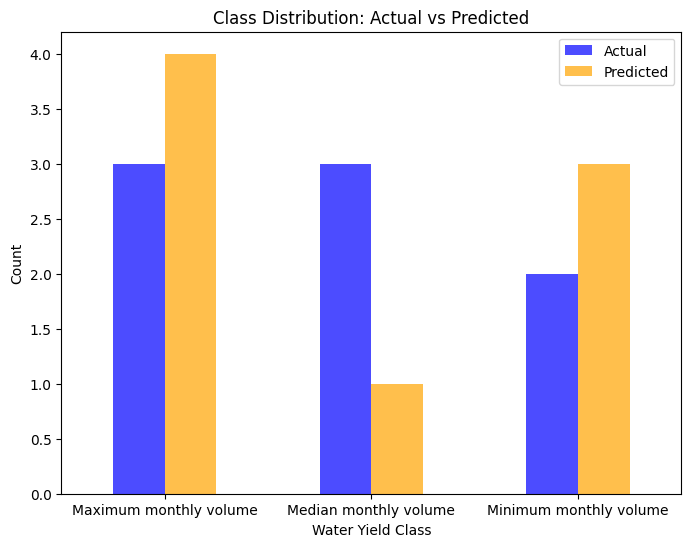

Region: Great Lakes drainage region -> Years: 1991/2020


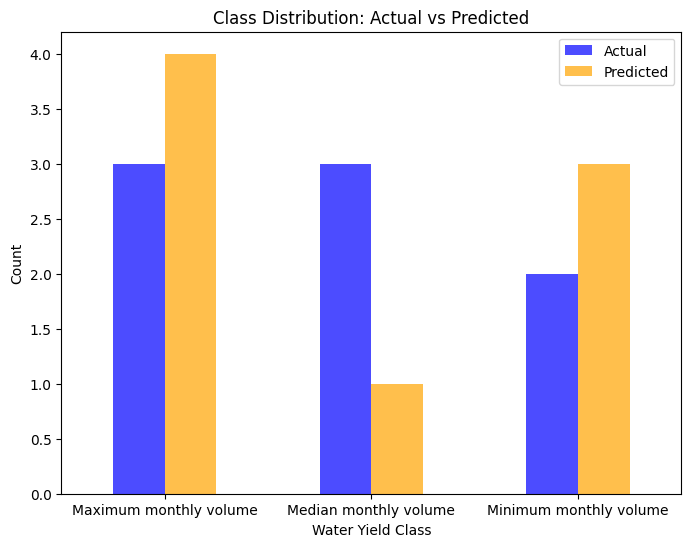

Region: Ottawa drainage region -> Years: 1971/2000


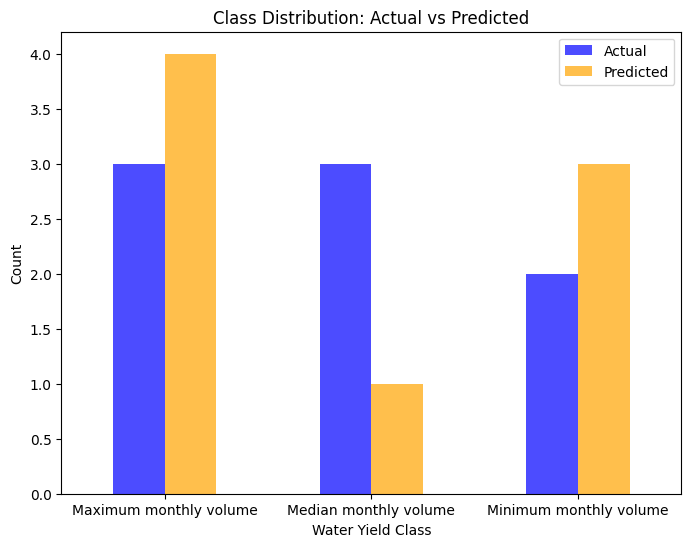

Region: Ottawa drainage region -> Years: 1981/2010


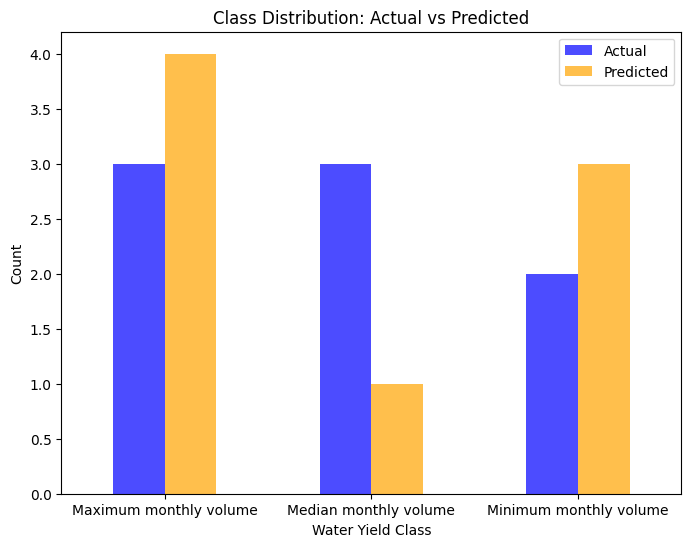

Region: Ottawa drainage region -> Years: 1991/2020


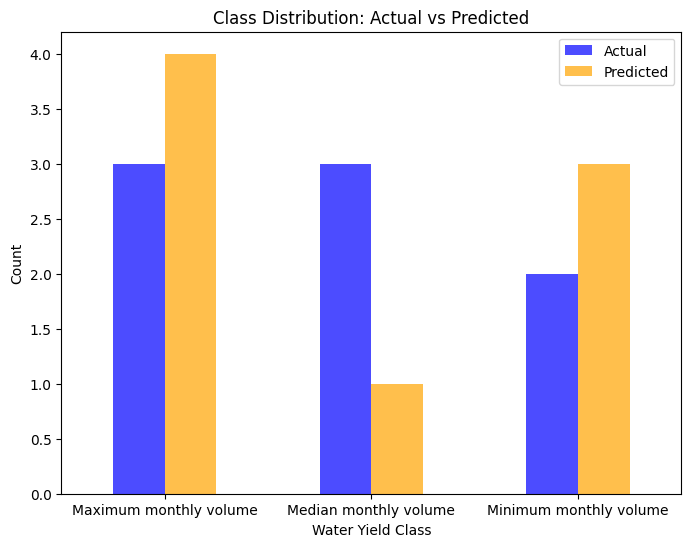

Region: St. Lawrence drainage region -> Years: 1971/2000


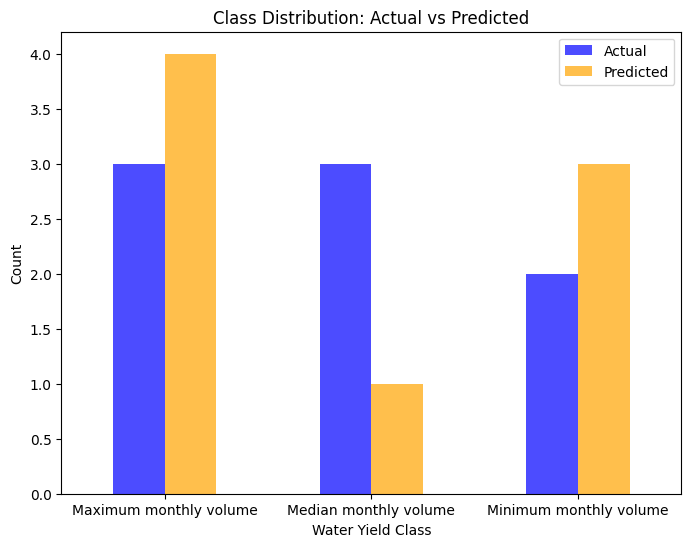

Region: St. Lawrence drainage region -> Years: 1981/2010


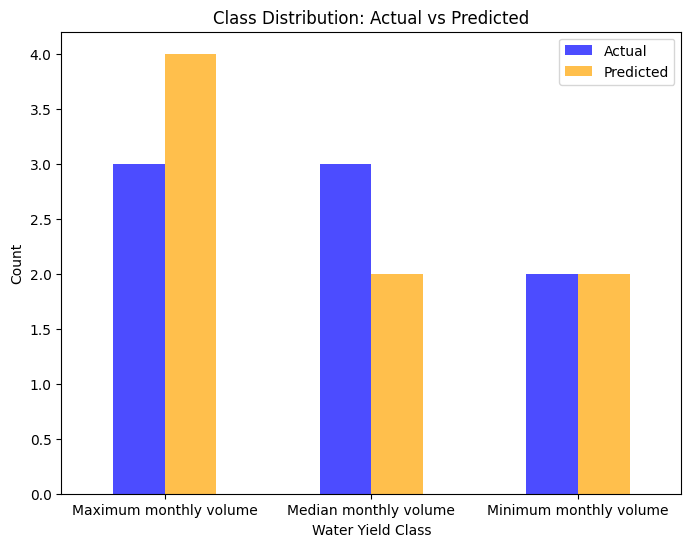

Region: St. Lawrence drainage region -> Years: 1991/2020


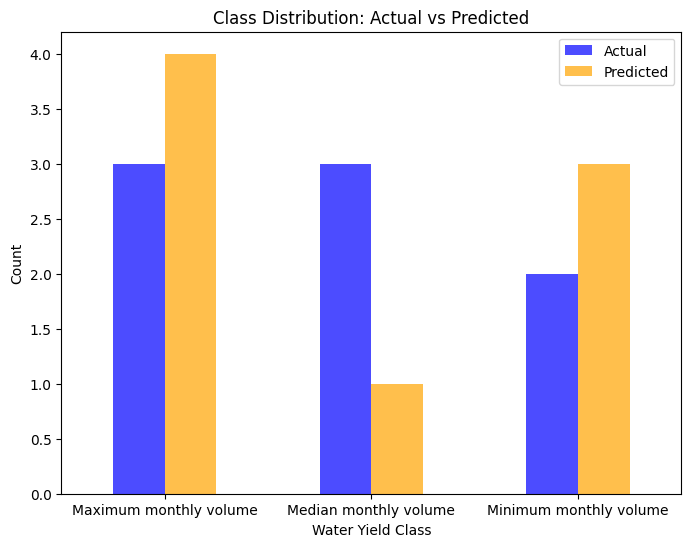

Region: North Shore-Gaspé drainage region -> Years: 1971/2000


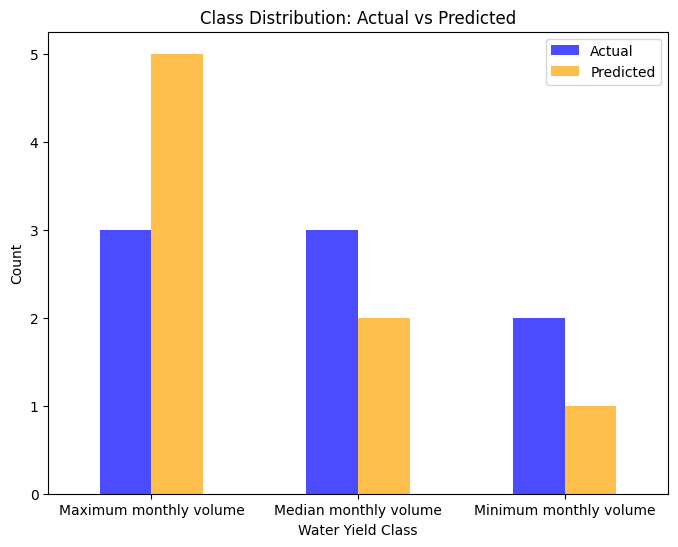

Region: North Shore-Gaspé drainage region -> Years: 1981/2010


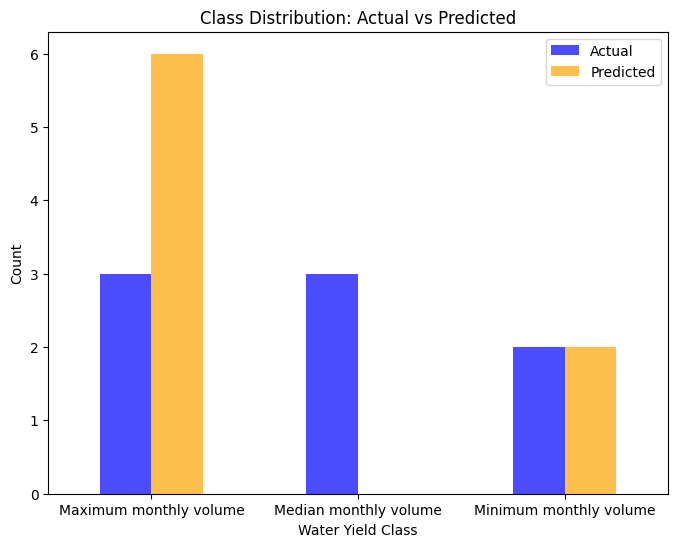

Region: North Shore-Gaspé drainage region -> Years: 1991/2020


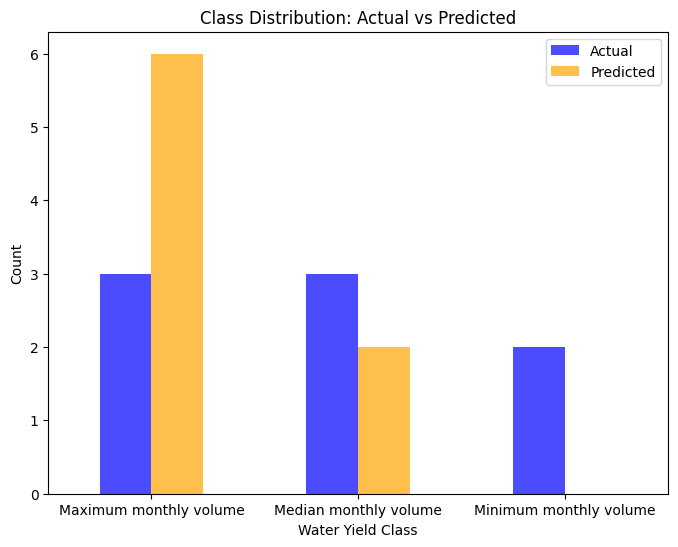

Region: Saint John-St. Croix drainage region -> Years: 1971/2000


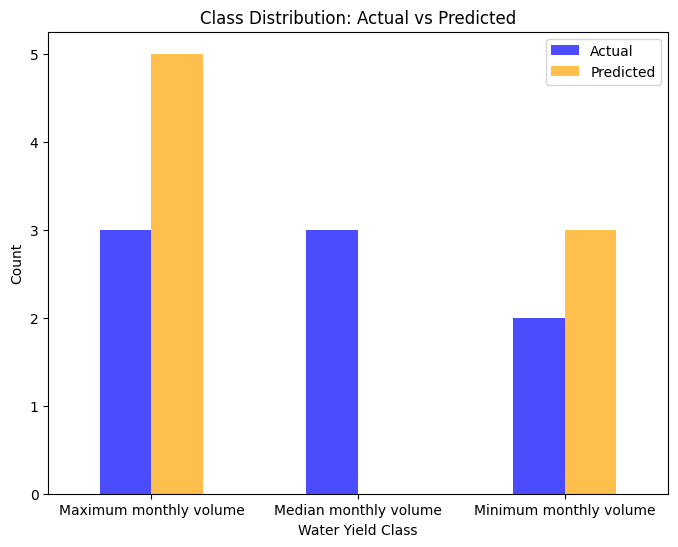

Region: Saint John-St. Croix drainage region -> Years: 1981/2010


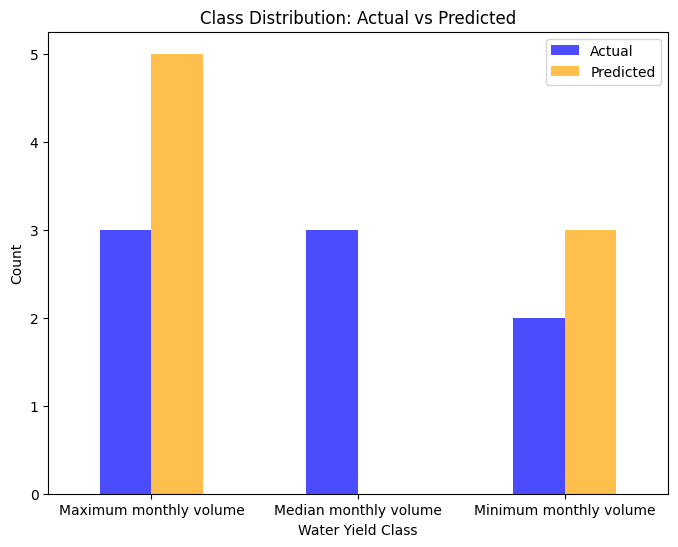

Region: Saint John-St. Croix drainage region -> Years: 1991/2020


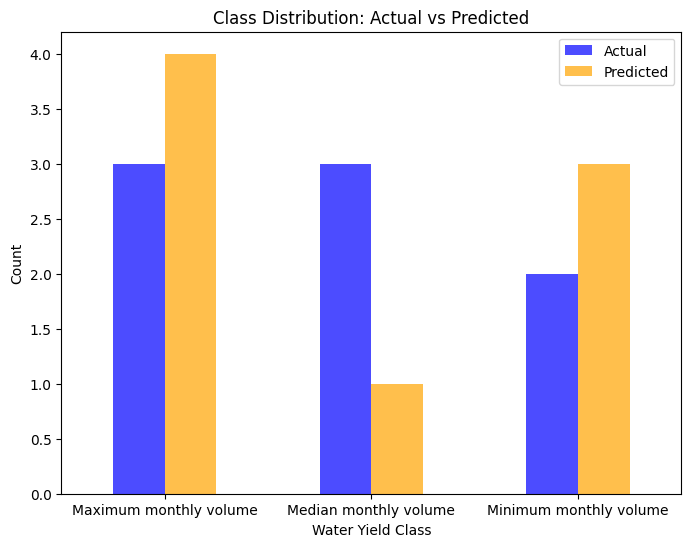

Region: Maritime Coastal drainage region -> Years: 1971/2000


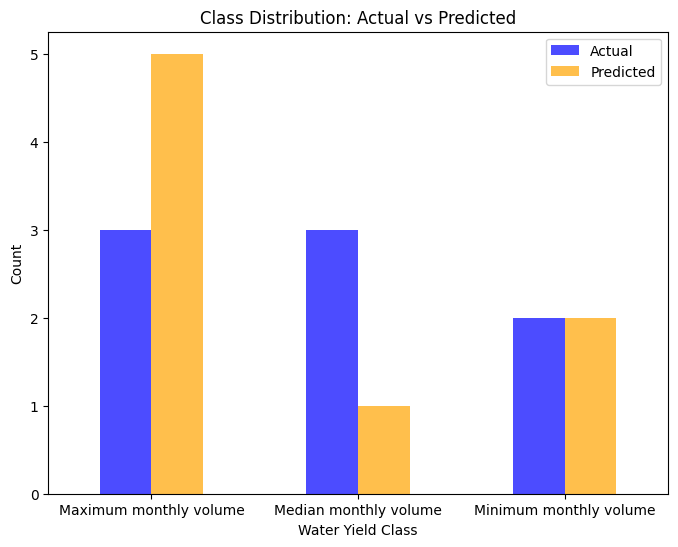

Region: Maritime Coastal drainage region -> Years: 1981/2010


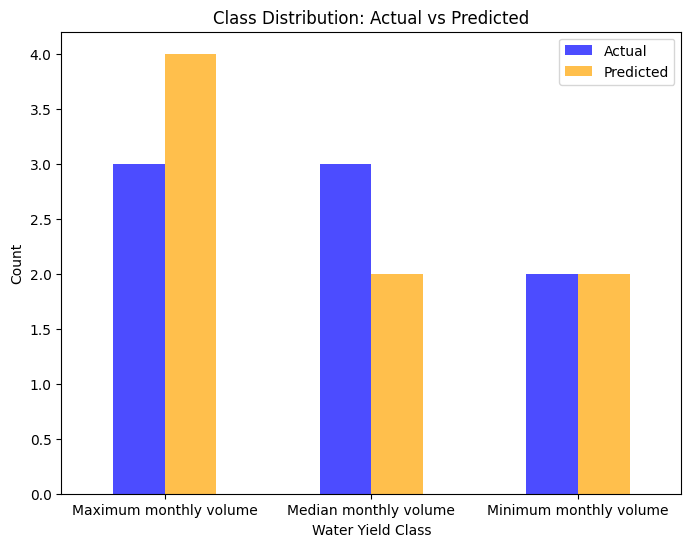

Region: Maritime Coastal drainage region -> Years: 1991/2020


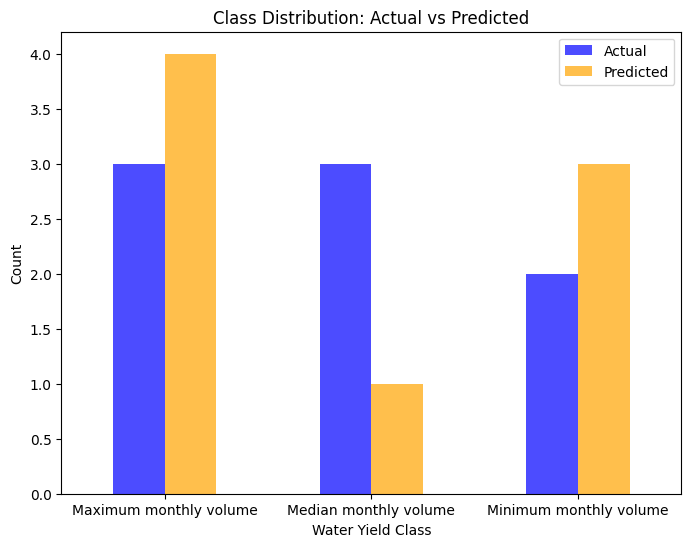

Region: Newfoundland (Island) drainage region -> Years: 1971/2000


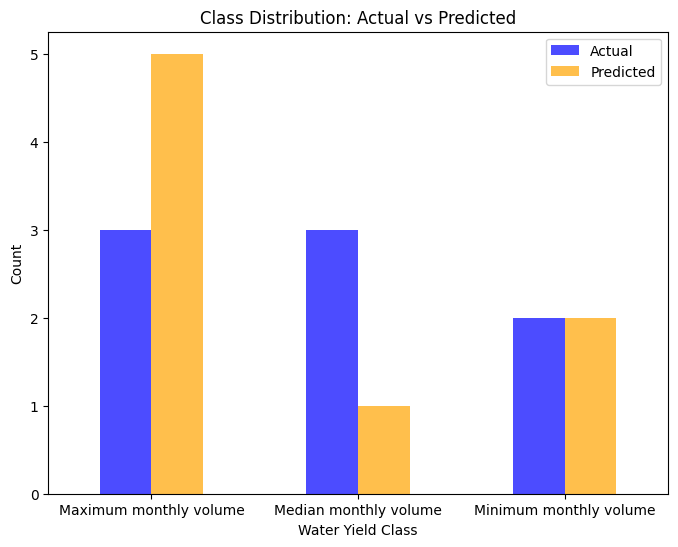

Region: Newfoundland (Island) drainage region -> Years: 1981/2010


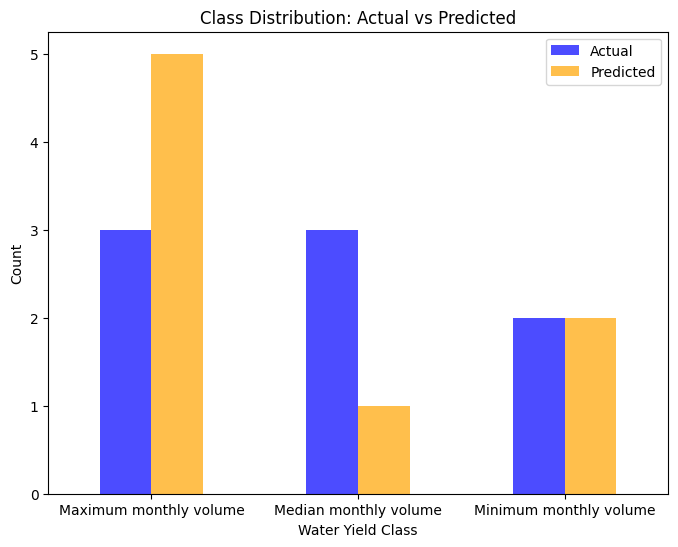

Region: Newfoundland (Island) drainage region -> Years: 1991/2020


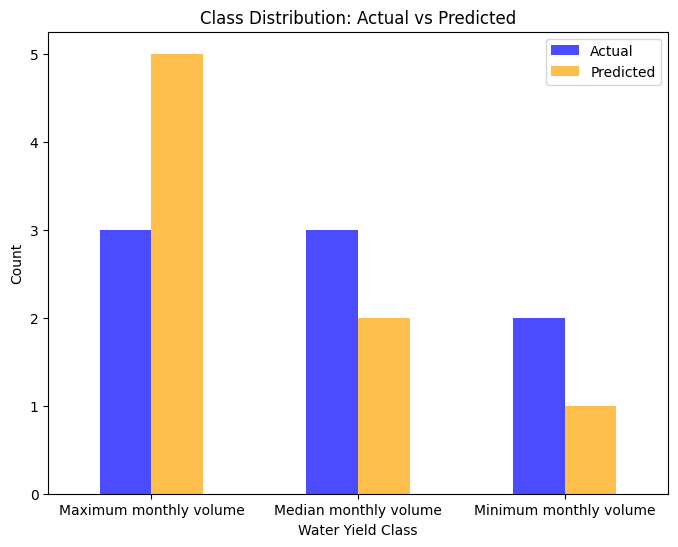

In [ ]:
for region in regions:
  for year in years:
    KNeighborsWaterYield(region, year)

# **Insights and conclusions**

You have now reached the end of the tutorial!

After reading through the project, readers with little to no understanding of the topic will gain a basic-level understanding of the water yields for the Canadian drainage regions. From general seasonal drainage between cold and warm months to a general view of the median drainage separated by regions, readers can see which regions are more impacted by drainage than others. Although our dataset lacks an adequate amount of data to creating a accurate machine learning model, using statistical models can still give readers a sense of what is occuring in Canada. Depending on the tests and data used, preforming statistical analysis can give one a general understanding of what is going on in terms of Canada's water yields, giving readers the opportunity to explore more themselves. Separating the area by region and observing the patterns over the months, readers can research more into the specfic location of the region and how specific events (human-made or natural) are impacting the surrounding area and environment.